In [1]:
import pandas as pd
import numpy as np
from toolkit import generate_k_folds, evaluate_reg, encode_one_hot
from linear_regression import LinearRegression
from tqdm.notebook import tqdm, trange

In [2]:

headers = ['sex', 'length', 'diameter', 'height', 'whole_weight',
          'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

df_abalone = pd.read_csv('../../datasets/abalone.data', names = headers)
df_abalone = df_abalone.sample(frac=1).reset_index(drop=True)


In [3]:
df_abalone['sex'] = encode_one_hot(df_abalone, 'sex', True)

In [4]:
# Making folds
folds = generate_k_folds(df_abalone['rings'], classification=False)

# Take one fold and make it the validation set
abalone_val = df_abalone.loc[folds[0]]
abalone_data = df_abalone.drop(folds[0])

# Next, make 5 folds out of the remaining 80% of the dataset
folds2 = generate_k_folds(abalone_data['rings'],classification=False)


val_X = abalone_val.drop('rings', axis= 1)
val_y = abalone_val['rings']


  0%|          | 0/5 [00:00<?, ?it/s]

Testing MSE for Fold 0 is 7.1311134760789665
Testing MSE for Fold 1 is 7.058144895376589
Testing MSE for Fold 2 is 7.897922633564566
Testing MSE for Fold 3 is 8.059276450934384
Testing MSE for Fold 4 is 7.656966210839943


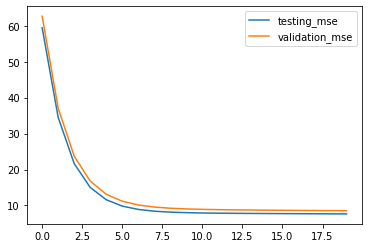

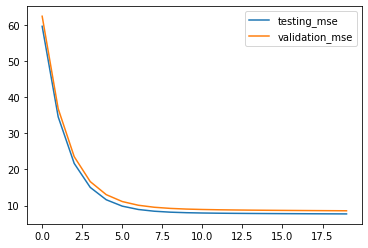

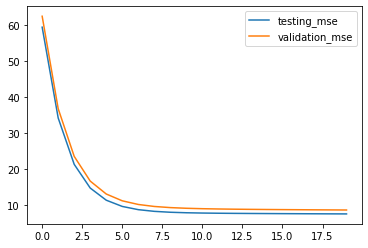

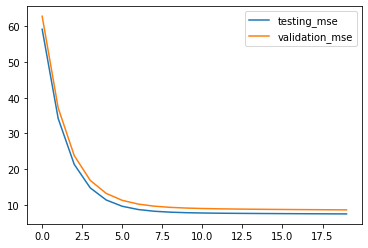

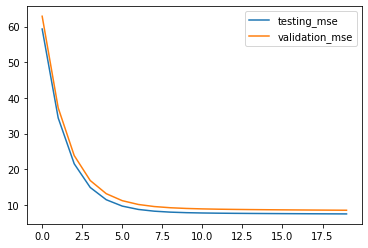

In [16]:
for fold in tqdm(range(len(folds2))):

    train = abalone_data.drop(folds2[fold])
    test = abalone_data.loc[folds2[fold]]

    train_X = train.drop('rings', axis= 1)
    train_y = train['rings']

    test_X = test.drop('rings', axis= 1)
    test_y = test['rings']
    linear_regression = LinearRegression(learning_rate=0.1, epochs = 20)
    linear_regression.fit(X=train_X, y =train_y, validation_X = val_X, validation_y = val_y)
    testing_mse = evaluate_reg(linear_regression.predict(test_X), test_y, 'mse')
    print(f"Testing MSE for Fold {fold} is {testing_mse}")
    


In [17]:
a = [7.1311134760789665, 7.058144895376589,7.897922633564566,8.059276450934384,7.656966210839943]

np.mean(a)

7.5606847333588885

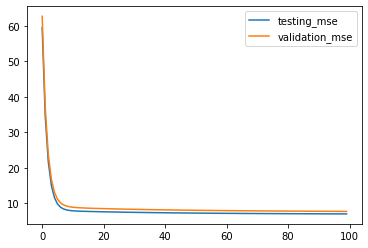

In [7]:
linear_regression.fit(X=train_X, y =train_y, validation_X = val_X, validation_y = val_y)

### Through testing with validation set, we have determined that the optimal training epoch is around 20 epochs at a learning rate of 0.1